In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df1 = df
df1.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [8]:
df1 = df.drop(['Unnamed: 0'],axis=1)
df1.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df1.shape

(200, 4)

In [13]:
df2 = df1.duplicated(subset='Sales ($)')
df2 = df1.drop_duplicates(subset='Sales ($)',keep='last')
print(df2.shape)

(121, 4)


<Axes: >

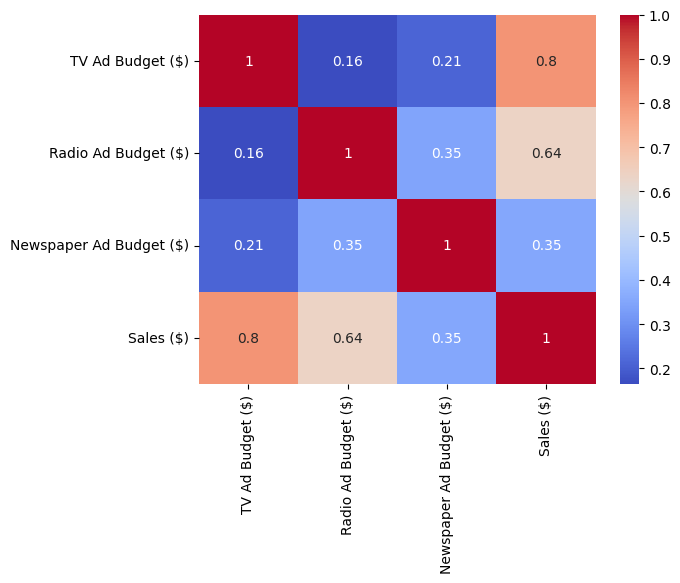

In [19]:
import seaborn as sns
corr_matrix = df2.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')


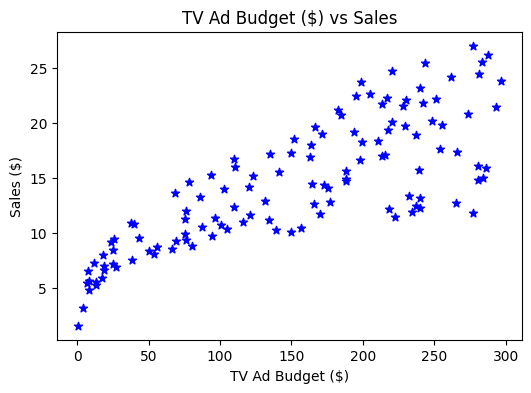

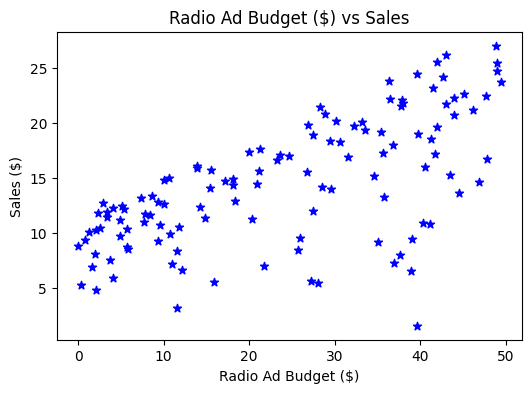

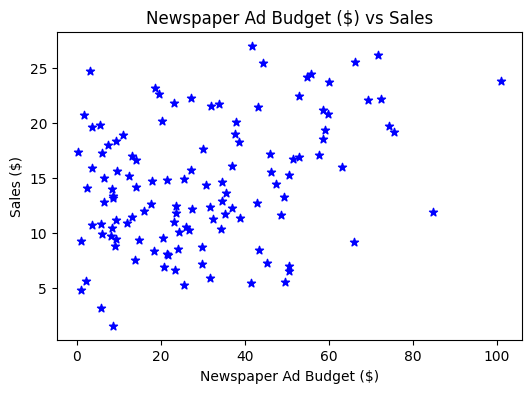

In [21]:
def scatter_plot(dataframe):
    columns = dataframe.columns
    y_axis = dataframe['Sales ($)']
    for column in columns:
        if column != 'Sales ($)':
            x_axis = dataframe[column]
            plt.figure(figsize=(6,4))
            plt.xlabel(column)
            plt.ylabel('Sales ($)')
            plt.title(f'{column} vs Sales')
            plt.scatter(x_axis,y_axis,color='blue',marker='*')
            
    plt.show()

scatter_plot(df2)

In [27]:
X = df2.iloc[:,0:2]
print(X.shape)
y = df2.iloc[:,-1]
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

(121, 2)
(121,)


In [29]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (96, 2)
X_test:  (25, 2)
y_train:  (96,)
y_test:  (25,)


In [31]:
lin_reg = LinearRegression()
regr = lin_reg.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(y_pred)

[ 3.47044384  7.31979467 14.51214078  6.3690401  25.09568691 13.19158413
 15.03606293 19.16163496 18.00902261 17.43300038 10.14964615 21.38335253
  3.57340196  6.59315106 15.43695801 23.50851576 13.8344045  16.99929917
  8.38553791 18.74230352 15.95002532 10.40579637 21.47225291 19.21811569
 12.32707258]


In [33]:
print('Intercept: ',regr.intercept_)
print('Coefficients: ',regr.coef_)

Intercept:  2.771535321870365
Coefficients:  [0.04765107 0.18669878]


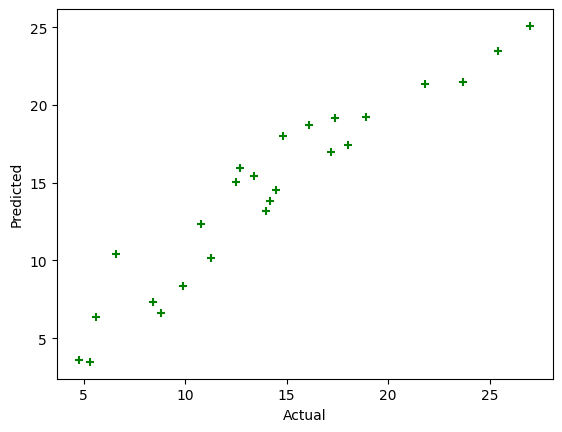

In [41]:
plt.scatter(y_test,y_pred,color='g',marker='+')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

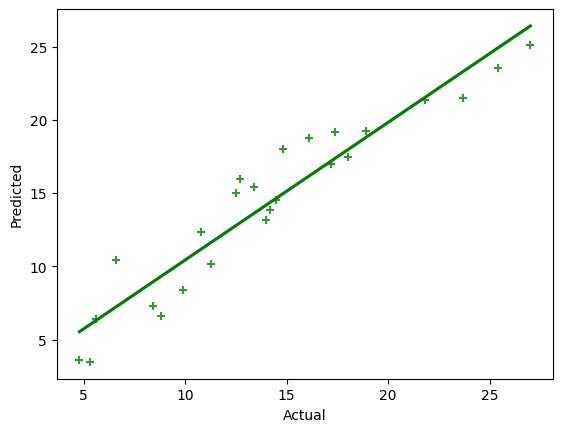

In [40]:
sns.regplot(x=y_test,y=y_pred,color='g',marker='+',ci=None)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

accuracy = r2_score(y_test,y_pred)
print('Accuracy: ',accuracy*100)

Accuracy:  90.36575522018873


In [42]:


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

1.570324039770059
3.481221052466192
1.8658030583280198
